# Working with an Initial Mass Function (IMF)

`airball` provides an initial mass function class `IMF` for randomly generating stellar masses for different stellar environments. "The initial mass function (IMF) is an empirical function that describes the initial distribution of masses for a population of stars during star formation" [(wikipedia)](https://en.wikipedia.org/wiki/Initial_mass_function).

First we import `airball`, and `matplotlib`. We also make sure to use a colour blind friendly palette.

In [1]:
import airball

import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('tableau-colorblind10')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Basics

The default IMF uses a piecewise combination of Salpeter (1955) for $m \geq 1\,M_\odot$ and Chabrier (2003) for single stars for $m < 1\,M_\odot$.

In [2]:
# Create an IMF with a specified mass range and default mass function
imf = airball.IMF(min_mass=0.1, max_mass=5)

# Generate a random mass from the IMF
random_mass = imf.random_mass()
print(random_mass)  # Output: e.g., 2.17830187243 solMass

0.4693150910766651 solMass


In [3]:
# Generate 5 random masses from the IMF
random_mass = imf.random_mass(size=5)
print(random_mass)  # Output: e.g., [1.1002683  0.94606418 0.7699541  1.1230717  0.13752477] solMass

[0.13662856 0.4800052  0.41204172 0.17140801 0.25395874] solMass


In [4]:
# Compute the median mass for the IMF
imf.median_mass # Output: e.g., 0.26322733 solMass

<Quantity 0.26322733 solMass>

## Providing your own IMF

You can provide your own IMF when initializing an instance of the class by passing a function to the `mass_function` parameter. The following examples use an IMF using Salpeter (1955) for the entire mass range or have a uniform IMF. The IMF you provide should be a probability density function (PDF). `airball` will normalize the PDF for you over the given mass range. You can define an IMF as a standard python function or as a lambda function.

In [5]:
# Define an IMF based on Salpeter (1955) and a (unphysical) uniform IMF.
def salpeter55(x): return x**-2.3
uniform = lambda x: 1

# Create an IMF with a specified mass range and default mass function
salpeter55_imf = airball.IMF(min_mass=0.1, max_mass=5, mass_function=salpeter55)
uniform_imf = airball.IMF(min_mass=0.1, max_mass=5, mass_function=uniform)

# Generate some random masses from the IMFs
print(salpeter55_imf.random_mass(5)) # Output: e.g., [2.13009562 0.10366307 0.91977187 0.11607485 0.11049281] solMass
print(uniform_imf.random_mass(5)) # Output: e.g., [4.81040127 4.13340906 3.64267182 3.37830285 3.81484321] solMass

[0.2075032  0.22789296 0.13005088 0.12731855 0.10116932] solMass
[4.76647027 4.50215873 1.86103416 1.55295137 1.72097985] solMass


In [6]:
# Compute the median masses for the IMFs
print(f'Salpeter (1955) median mass: {salpeter55_imf.median_mass:1.5f}')
print(f'Uniform PDF median mass: {uniform_imf.median_mass:1.5f}')

Salpeter (1955) median mass: 0.16970 solMass
Uniform PDF median mass: 2.55000 solMass


We can visually compare the different distributions by plotting their PDFs. We can also see how the generating function corresponds to the PDF. For convenience, we can call the `IMF.masses` function to generate a `numpy.logspace` array over the IMF mass range.

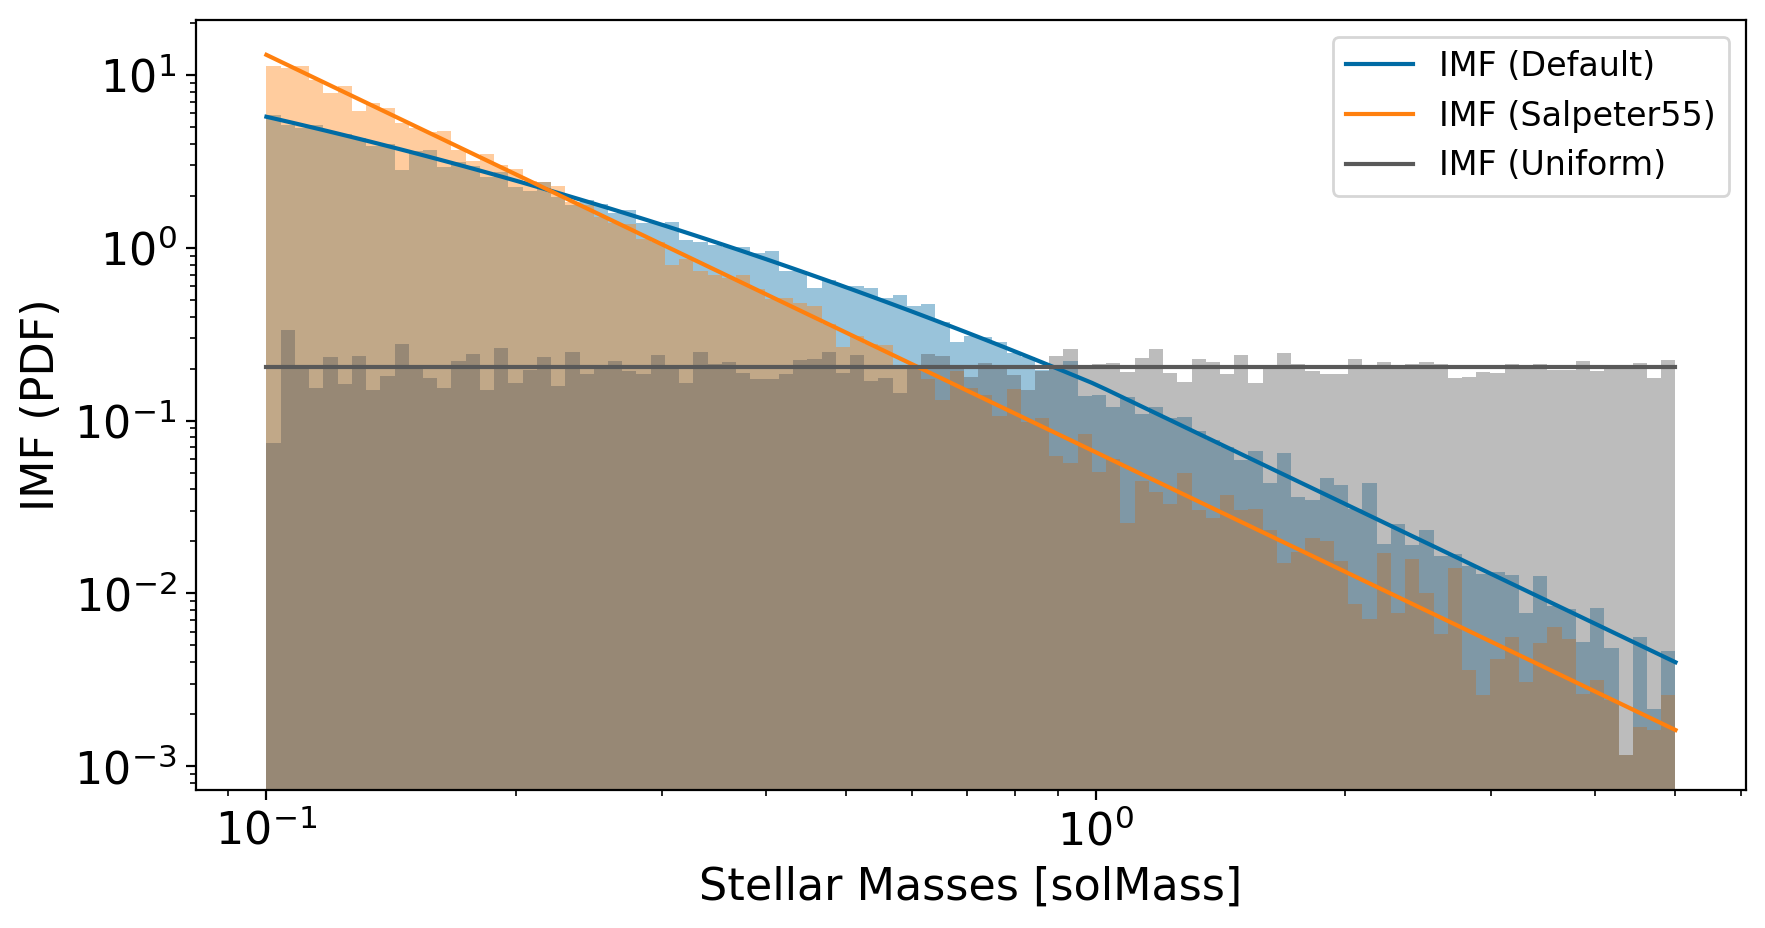

In [7]:
npoints = 100
nsamples = 10_000
plt.rcParams.update({'font.size': 16})
fig,ax = plt.subplots(1,1, figsize=(10,5))

ax.loglog(imf.masses(npoints), imf.pdf(imf.masses(npoints)), 'C0', label='IMF (Default)')
ax.loglog(salpeter55_imf.masses(npoints), salpeter55_imf.pdf(salpeter55_imf.masses(npoints)), 'C1', label='IMF (Salpeter55)')
ax.loglog(uniform_imf.masses(npoints), uniform_imf.pdf(uniform_imf.masses(npoints)), 'C3', label='IMF (Uniform)')

ax.hist(imf.random_mass(nsamples).value, bins=imf.masses(npoints), density=True, color='C0', alpha=0.4)
ax.hist(salpeter55_imf.random_mass(nsamples).value, bins=salpeter55_imf.masses(npoints), density=True, color='C1', alpha=0.4)
ax.hist(uniform_imf.random_mass(nsamples).value, bins=uniform_imf.masses(npoints), density=True, color='C3', alpha=0.4)

ax.legend(prop={'size': 12})
ax.set_xlabel(f'Stellar Masses [{imf.unit}]')
ax.set_ylabel('IMF (PDF)')
plt.show()

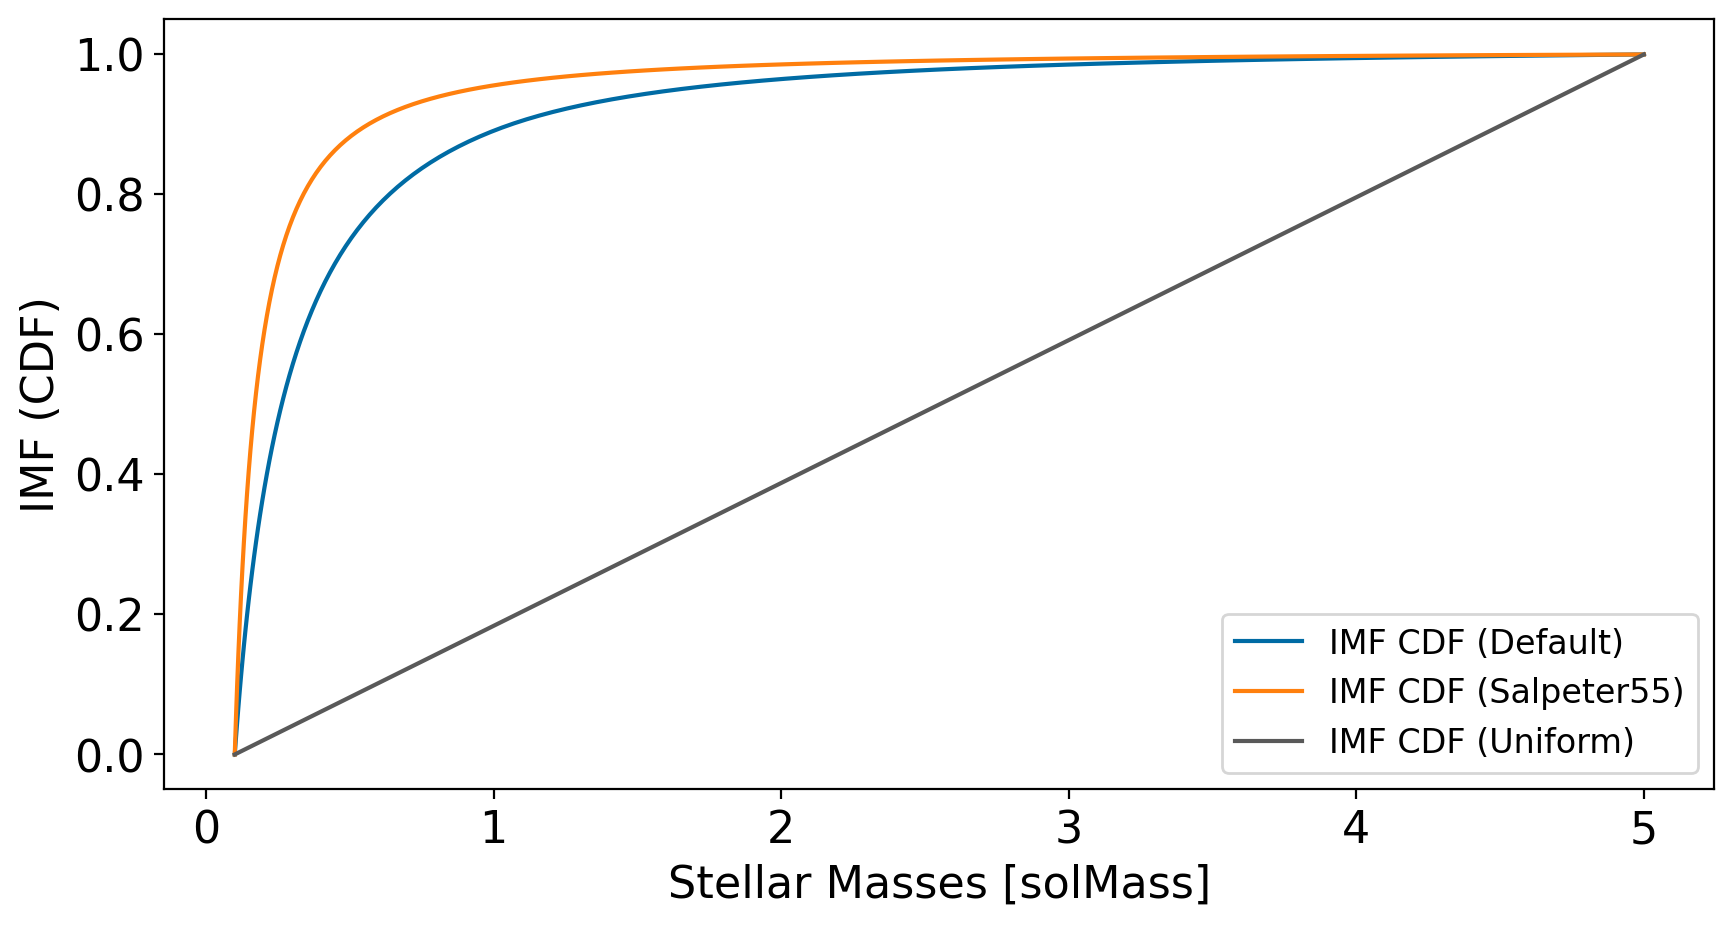

In [8]:
npoints = 100
plt.rcParams.update({'font.size': 16})
fig,ax = plt.subplots(1,1, figsize=(10,5))

ax.plot(imf.masses(npoints), imf.cdf(imf.masses(npoints)), 'C0', label='IMF CDF (Default)')
ax.plot(salpeter55_imf.masses(npoints), salpeter55_imf.cdf(salpeter55_imf.masses(npoints)), 'C1', label='IMF CDF (Salpeter55)')
ax.plot(uniform_imf.masses(npoints), uniform_imf.cdf(uniform_imf.masses(npoints)), 'C3', label='IMF CDF (Uniform)')

ax.legend(prop={'size': 12})
ax.set_xlabel(f'Stellar Masses [{imf.unit}]')
ax.set_ylabel('IMF (CDF)')
plt.show()